# W200- Project 2

**Team members:**
<br>
Isabel Garcia Pietri
<br>
Jamie Smith
<br>
Lucas Barbosa

## Income Inequality

### Import World Income Inequality dataset

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import imgkit
%matplotlib inline

## Import data with economic inequality data
data = pd.read_csv('WIID_Data/WIID_06MAY2020.csv') 

### Explore dataset

In [2]:
# Get number of rows and columns
data.shape

(11826, 59)

In [3]:
# Inspect first 5 rows
data.head()

,id,country,c3,c2,year,gini_reported,palma,ratio_top20bottom20,bottom40,q1,...,gdp_ppp_pc_usd2011,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link
0,1,Afghanistan,AFG,AF,2008,29.00,NaN,4.33,22.00,9.00,...,1268.0,27722282.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...
1,2,Afghanistan,AFG,AF,2012,33.00,NaN,4.11,23.00,9.00,...,1773.0,31161378.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...
2,3,Afghanistan,AFG,AF,2017,31.00,NaN,4.44,22.00,9.00,...,1758.0,36296108.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...
3,4,Albania,ALB,AL,1996,27.01,0.93,3.95,22.85,9.15,...,4635.0,3098699.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
4,5,Albania,ALB,AL,2002,31.74,1.22,4.83,20.93,8.35,...,6088.0,3126183.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...


In [4]:
# Explore statistics of columns
data.describe()

,id,year,gini_reported,palma,ratio_top20bottom20,bottom40,q1,q2,q3,q4,...,bottom5,top5,mean,median,exchangerate,mean_usd,median_usd,gdp_ppp_pc_usd2011,population,quality_score
count,11826.000000,11826.000000,11747.000000,6714.000000,7503.000000,7459.000000,7576.000000,7354.000000,7375.000000,7381.000000,...,1928.000000,2568.000000,6.417000e+03,5.003000e+03,6.301000e+03,135.000000,59.000000,8300.000000,1.176500e+04,11826.000000
mean,5913.500000,1996.104346,38.232630,2.176460,9.679664,17.155084,6.256121,10.882979,15.294922,21.712025,...,1.080892,18.393326,3.684624e+05,2.233041e+05,9.743789e+00,9713.844444,15941.610169,21660.805783,7.999902e+07,11.145189
std,3414.016476,15.850131,10.202797,1.647452,9.273387,4.864324,2.357871,2.610924,2.450347,1.850854,...,0.408160,6.759756,2.286042e+06,1.554102e+06,8.647285e+01,13519.529419,10803.842233,16768.592126,2.153338e+08,2.306159
min,1.000000,1867.000000,12.100000,0.520000,1.890000,1.600000,0.200000,1.300000,4.200000,10.600000,...,0.090000,9.100000,4.000000e-01,1.000000e+00,8.099710e-14,32.000000,571.000000,6.000000,1.052100e+04,3.000000
25%,2957.250000,1988.000000,30.300000,1.150000,4.870000,13.200000,4.300000,8.800000,13.470000,20.740000,...,0.800000,14.000000,3.698190e+03,3.253350e+03,3.545008e-02,261.000000,8233.000000,8417.000000,5.242395e+06,11.000000
50%,5913.500000,1999.000000,36.480000,1.610000,7.020000,17.590000,6.280000,11.230000,15.920000,22.150000,...,1.100000,16.085000,1.240600e+04,1.102700e+04,2.500000e-01,1524.000000,15713.000000,16869.000000,1.526800e+07,12.000000
75%,8869.750000,2009.000000,46.000000,2.810000,12.130000,20.990000,8.100000,12.970000,17.280000,22.850000,...,1.380000,20.732500,3.303200e+04,2.616350e+04,1.000000e+00,18527.500000,21417.500000,33249.000000,5.665563e+07,13.000000
max,11826.000000,2018.000000,78.600000,39.810000,293.000000,31.160000,14.600000,17.180000,21.100000,31.800000,...,2.300000,60.000000,4.827100e+07,4.544640e+07,1.756961e+03,56140.000000,41967.000000,122637.000000,1.421022e+09,13.000000


In [5]:
# Explore columns
data.columns

Index(['id', 'country', 'c3', 'c2', 'year', 'gini_reported', 'palma',
       'ratio_top20bottom20', 'bottom40', 'q1', 'q2', 'q3', 'q4', 'q5', 'd1',
       'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'bottom5',
       'top5', 'resource', 'resource_detailed', 'scale', 'scale_detailed',
       'sharing_unit', 'reference_unit', 'areacovr', 'areacovr_detailed',
       'popcovr', 'popcovr_detailed', 'region_un', 'region_un_sub',
       'region_wb', 'eu', 'oecd', 'incomegroup', 'mean', 'median', 'currency',
       'reference_period', 'exchangerate', 'mean_usd', 'median_usd',
       'gdp_ppp_pc_usd2011', 'population', 'revision', 'quality',
       'quality_score', 'source', 'source_detailed', 'source_comments',
       'survey', 'link'],
      dtype='object')

### Extract relevant gini data

In [6]:
# As we are interested in data for the entire country we need to exclude data points that are not 
# representative of the entire country

# filter areacovr variable to only include category All (nationally representative)
# -> areacovr: Area coverage. The land area which was included in the original sample surveys etc.

# filter popcovr variable to only include category All
# -> popcovr: Population coverage. The population covered in the sample surveys in the land area 
# (all, rural, urban etc.) which was included

gini = data[(data.areacovr == "All") & (data.popcovr == "All")]
gini

,id,country,c3,c2,year,gini_reported,palma,ratio_top20bottom20,bottom40,q1,...,gdp_ppp_pc_usd2011,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link
0,1,Afghanistan,AFG,AF,2008,29.00,NaN,4.33,22.00,9.00,...,1268.0,27722282.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...
1,2,Afghanistan,AFG,AF,2012,33.00,NaN,4.11,23.00,9.00,...,1773.0,31161378.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...
2,3,Afghanistan,AFG,AF,2017,31.00,NaN,4.44,22.00,9.00,...,1758.0,36296108.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...
3,4,Albania,ALB,AL,1996,27.01,0.93,3.95,22.85,9.15,...,4635.0,3098699.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
4,5,Albania,ALB,AL,2002,31.74,1.22,4.83,20.93,8.35,...,6088.0,3126183.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,11820,Zimbabwe,ZWE,ZW,1990,56.80,4.57,15.66,10.27,3.98,...,2889.0,10183113.0,NaN,Low,13,World Bank,World Bank 2002,Poverty Monitoring Database,Poverty Income Consumption and Expenditure Sur...,NaN
11820,11821,Zimbabwe,ZWE,ZW,1995,74.60,17.81,110.17,3.49,0.69,...,2758.0,11320346.0,NaN,Low,13,World Bank,"Deininger and Squire, World Bank 2004",World Bank. Compilation,Poverty Income Consumption and Expenditure Sur...,NaN
11821,11822,Zimbabwe,ZWE,ZW,1995,70.30,12.92,48.96,5.22,1.58,...,2758.0,11320346.0,NaN,Low,13,World Bank,"Deininger and Squire, World Bank 2004",World Bank. Compilation,Poverty Income Consumption and Expenditure Sur...,NaN
11822,11823,Zimbabwe,ZWE,ZW,2011,42.30,NaN,NaN,NaN,NaN,...,1943.0,14386649.0,New 2013,High,11,National statistical authority,Zimbabwe National Statistics Agency 2011,Zimbabwe Poverty Profile Report,Poverty Income Consumption and Expenditure Sur...,NaN


In [7]:
# We also want to select data only for the 10 years of interest
# Let's see how much data entries we have per year in the dataset
gini["year"].value_counts()[[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]]

2005    291
2006    295
2007    376
2008    313
2009    320
2010    451
2011    319
2012    327
2013    396
2014    320
2015    275
2016    224
2017    130
2018     49
Name: year, dtype: int64

In [8]:
# Will extract 10 years (2009-2018) 
# Even though 2018 have less entries than other years, wanted to keep it because it cointains latest
# recorded trends in countries.

gini = gini[(gini["year"] == 2009) | (gini["year"] == 2010) | (gini["year"] == 2011) |
            (gini["year"] == 2012) | (gini["year"] == 2013) | (gini["year"] == 2014) |
            (gini["year"] == 2015) | (gini["year"] == 2016) | (gini["year"] == 2017) |
            (gini["year"] == 2018)   
           ]

gini


,id,country,c3,c2,year,gini_reported,palma,ratio_top20bottom20,bottom40,q1,...,gdp_ppp_pc_usd2011,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link
1,2,Afghanistan,AFG,AF,2012,33.00,NaN,4.11,23.00,9.00,...,1773.0,31161378.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...
2,3,Afghanistan,AFG,AF,2017,31.00,NaN,4.44,22.00,9.00,...,1758.0,36296108.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...
7,8,Albania,ALB,AL,2012,28.96,1.04,4.27,22.02,8.85,...,10321.0,2914091.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
10,11,Algeria,DZA,DZ,2012,27.62,0.99,3.98,23.02,9.36,...,13226.0,37383900.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
14,15,Andorra,AND,AD,2016,27.96,1.00,3.91,23.10,9.70,...,NaN,77295.0,New 2019,High,13,National statistical authority,Andorra Ministry of Finance,NaN,l’Enquesta de Pressupostos Familiars (EPF),https://www.estadistica.ad/serveiestudis/publi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11734,11735,Yemen,YEM,YE,2014,36.71,1.57,6.13,18.76,7.29,...,3828.0,25823488.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
11813,11814,Zambia,ZMB,ZM,2010,55.62,4.28,16.02,10.57,3.81,...,3338.0,13605986.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
11814,11815,Zambia,ZMB,ZM,2015,57.14,5.00,21.27,8.88,2.88,...,3678.0,15879370.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
11822,11823,Zimbabwe,ZWE,ZW,2011,42.30,NaN,NaN,NaN,NaN,...,1943.0,14386649.0,New 2013,High,11,National statistical authority,Zimbabwe National Statistics Agency 2011,Zimbabwe Poverty Profile Report,Poverty Income Consumption and Expenditure Sur...,NaN


In [9]:
# Now let's explore the quality of the remaining measurements
gini.groupby(["quality"]).size()

quality
Average       662
High         2145
Low             1
Not known       2
dtype: int64

In [10]:
# We want to keep only data entries with "High" and "Average" quality

gini = gini[(gini["quality"] == "High") | (gini["quality"] == "Average")]
gini


,id,country,c3,c2,year,gini_reported,palma,ratio_top20bottom20,bottom40,q1,...,gdp_ppp_pc_usd2011,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link
1,2,Afghanistan,AFG,AF,2012,33.00,NaN,4.11,23.00,9.00,...,1773.0,31161378.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...
2,3,Afghanistan,AFG,AF,2017,31.00,NaN,4.44,22.00,9.00,...,1758.0,36296108.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...
7,8,Albania,ALB,AL,2012,28.96,1.04,4.27,22.02,8.85,...,10321.0,2914091.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
10,11,Algeria,DZA,DZ,2012,27.62,0.99,3.98,23.02,9.36,...,13226.0,37383900.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
14,15,Andorra,AND,AD,2016,27.96,1.00,3.91,23.10,9.70,...,NaN,77295.0,New 2019,High,13,National statistical authority,Andorra Ministry of Finance,NaN,l’Enquesta de Pressupostos Familiars (EPF),https://www.estadistica.ad/serveiestudis/publi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11734,11735,Yemen,YEM,YE,2014,36.71,1.57,6.13,18.76,7.29,...,3828.0,25823488.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
11813,11814,Zambia,ZMB,ZM,2010,55.62,4.28,16.02,10.57,3.81,...,3338.0,13605986.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
11814,11815,Zambia,ZMB,ZM,2015,57.14,5.00,21.27,8.88,2.88,...,3678.0,15879370.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
11822,11823,Zimbabwe,ZWE,ZW,2011,42.30,NaN,NaN,NaN,NaN,...,1943.0,14386649.0,New 2013,High,11,National statistical authority,Zimbabwe National Statistics Agency 2011,Zimbabwe Poverty Profile Report,Poverty Income Consumption and Expenditure Sur...,NaN


### Group dataset by country and by year

In [11]:
# Will group by country and year and then will unstack to have years as columns

by_country = gini.groupby(["country","year"])
by_country

In [12]:
# Get gini values by country and by year
# Multiple gini coefficient values for the same year are averaged.
gini_values = by_country[["gini_reported"]].mean().unstack()
gini_values

gini_reported                                     \
year                        2009       2010    2011       2012 2013   
country                                                               
Afghanistan                  NaN        NaN     NaN  33.000000  NaN   
Albania                      NaN        NaN     NaN  28.960000  NaN   
Algeria                      NaN        NaN     NaN  27.620000  NaN   
Andorra                      NaN        NaN     NaN        NaN  NaN   
Angola                 46.906667        NaN     NaN        NaN  NaN   
...                          ...        ...     ...        ...  ...   
Vietnam                      NaN  40.164286     NaN  37.292857  NaN   
West Bank and Gaza     36.080000  37.245000  36.410        NaN  NaN   
Yemen                        NaN        NaN     NaN        NaN  NaN   
Zambia                       NaN  55.620000     NaN        NaN  NaN   
Zimbabwe                     NaN        NaN  42.725        NaN  NaN   

                                                           
year                     2014   2015    2016   2017  2018  
country                                                    
Afghanistan               NaN    NaN     NaN  31.00   NaN  
Albania                   NaN    NaN     NaN    NaN   NaN  
Algeria                   NaN    NaN     NaN    NaN   NaN  
Andorra                   NaN    NaN  27.960    NaN   NaN  
Angola                    NaN    NaN     NaN    NaN   NaN  
...                       ...    ...     ...    ...   ...  
Vietnam             36.476667    NaN  39.185    NaN  42.4  
West Bank and Gaza        NaN    NaN     NaN  33.69   NaN  
Yemen               36.710000    NaN     NaN    NaN   NaN  
Zambia                    NaN  57.14     NaN    NaN   NaN  
Zimbabwe                  NaN    NaN     NaN    NaN   NaN  

[171 rows x 10 columns]

In [13]:
# There are 171 rows (and we have 200 countries in the dataset)
# This means that only 171 countries have at least one gini data entry between 2009 and 2018

In [14]:
gini_values.columns

MultiIndex([('gini_reported', 2009),
            ('gini_reported', 2010),
            ('gini_reported', 2011),
            ('gini_reported', 2012),
            ('gini_reported', 2013),
            ('gini_reported', 2014),
            ('gini_reported', 2015),
            ('gini_reported', 2016),
            ('gini_reported', 2017),
            ('gini_reported', 2018)],
           names=[None, 'year'])

In [15]:
# Remove multi-index level in columns
gini_values.columns = gini_values.columns.droplevel(0)

In [16]:
gini_values.columns

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='year')

In [17]:
# Change column name from integer to strings
gini_values.columns = gini_values.columns.astype(str)

### Regions table

In [18]:
# Create a DataFrame with countries and regions
# Later will merge this DataFrame with gini_values

# First check if region for each country is unique (or there are inconsistencies)
# Create a function
def is_unique(a):
    """Takes a series 'a' and returns True if all values are the same, 
    and False otherwise"""
    return len(a.unique()) == 1

In [19]:
# Check values for region_un series in all countries
data.groupby("country")['region_un'].agg(is_unique).all()

True

In [20]:
# Check values for region_un_sub series in all countries
data.groupby("country")['region_un_sub'].agg(is_unique).all()

True

In [21]:
# Now that values are checked, will use First to aggregate 
# region_un and region_un_sub
regions = pd.DataFrame(data.groupby("country")["region_un"].first())
regions

,region_un
country,
Afghanistan,Asia
Albania,Europe
Algeria,Africa
Andorra,Europe
Angola,Africa
...,...
West Bank and Gaza,Asia
Yemen,Asia
Yugoslavia,Europe


In [22]:
# Rename column
regions = regions.rename(columns = {"region_un":"region"})
regions

,region
country,
Afghanistan,Asia
Albania,Europe
Algeria,Africa
Andorra,Europe
Angola,Africa
...,...
West Bank and Gaza,Asia
Yemen,Asia
Yugoslavia,Europe


In [23]:
# Add sub-region column
regions["sub_region"] = data.groupby("country")['region_un_sub'].first()

In [24]:
regions

,region,sub_region
country,,
Afghanistan,Asia,Southern Asia
Albania,Europe,Southern Europe
Algeria,Africa,Northern Africa
Andorra,Europe,Southern Europe
Angola,Africa,Middle Africa
...,...,...
West Bank and Gaza,Asia,Western Asia
Yemen,Asia,Western Asia
Yugoslavia,Europe,Southern Europe


In [25]:
# Include 3-digits and 2-digits country code
# Check if values are unique for all countries
data.groupby("country")["c3"].agg(is_unique).all()

True

In [26]:
data.groupby("country")["c2"].agg(is_unique).all()

True

In [27]:
# extract 3-digit codes
code3 = data.groupby("country")["c3"].first()
code3

country
Afghanistan           AFG
Albania               ALB
Algeria               DZA
Andorra               AND
Angola                AGO
                     ... 
West Bank and Gaza    PSE
Yemen                 YEM
Yugoslavia            YUG
Zambia                ZMB
Zimbabwe              ZWE
Name: c3, Length: 200, dtype: object

In [28]:
# extract 2-digit codes
code2 = data.groupby("country")["c2"].first()
code2

country
Afghanistan           AF
Albania               AL
Algeria               DZ
Andorra               AD
Angola                AO
                      ..
West Bank and Gaza    PS
Yemen                 YE
Yugoslavia            YU
Zambia                ZM
Zimbabwe              ZW
Name: c2, Length: 200, dtype: object

In [29]:
# Insert as columns in regions DataFrame
regions["code3"] = code3
regions["code2"] = code2

In [30]:
regions

,region,sub_region,code3,code2
country,,,,
Afghanistan,Asia,Southern Asia,AFG,AF
Albania,Europe,Southern Europe,ALB,AL
Algeria,Africa,Northern Africa,DZA,DZ
Andorra,Europe,Southern Europe,AND,AD
Angola,Africa,Middle Africa,AGO,AO
...,...,...,...,...
West Bank and Gaza,Asia,Western Asia,PSE,PS
Yemen,Asia,Western Asia,YEM,YE
Yugoslavia,Europe,Southern Europe,YUG,YU


In [31]:
# Re-order columns

regions = regions[['code3', 'code2','region', 'sub_region']]

regions

,code3,code2,region,sub_region
country,,,,
Afghanistan,AFG,AF,Asia,Southern Asia
Albania,ALB,AL,Europe,Southern Europe
Algeria,DZA,DZ,Africa,Northern Africa
Andorra,AND,AD,Europe,Southern Europe
Angola,AGO,AO,Africa,Middle Africa
...,...,...,...,...
West Bank and Gaza,PSE,PS,Asia,Western Asia
Yemen,YEM,YE,Asia,Western Asia
Yugoslavia,YUG,YU,Europe,Southern Europe


### Final gini table

#### Merge tables

In [32]:
# Merge regions and gini_values

In [33]:
final_gini = pd.merge(regions, gini_values, how='left', on="country")

In [34]:
final_gini

,code3,code2,region,sub_region,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.00,NaN,NaN,NaN,NaN,31.00,NaN
Albania,ALB,AL,Europe,Southern Europe,NaN,NaN,NaN,28.96,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,DZA,DZ,Africa,Northern Africa,NaN,NaN,NaN,27.62,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,AD,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.96,NaN,NaN
Angola,AGO,AO,Africa,Middle Africa,46.906667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,PSE,PS,Asia,Western Asia,36.080000,37.245,36.410,NaN,NaN,NaN,NaN,NaN,33.69,NaN
Yemen,YEM,YE,Asia,Western Asia,NaN,NaN,NaN,NaN,NaN,36.71,NaN,NaN,NaN,NaN
Yugoslavia,YUG,YU,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Rename columns
final_gini = final_gini.rename(columns = {"2009":"g2009", "2010":"g2010", "2011":"g2011", "2012":"g2012",
                                "2013":"g2013", "2014":"g2014", "2015":"g2015", "2016":"g2016",
                                "2017":"g2017", "2018":"g2018"
                               })
final_gini

,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018
country,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.00,NaN,NaN,NaN,NaN,31.00,NaN
Albania,ALB,AL,Europe,Southern Europe,NaN,NaN,NaN,28.96,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,DZA,DZ,Africa,Northern Africa,NaN,NaN,NaN,27.62,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,AD,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.96,NaN,NaN
Angola,AGO,AO,Africa,Middle Africa,46.906667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,PSE,PS,Asia,Western Asia,36.080000,37.245,36.410,NaN,NaN,NaN,NaN,NaN,33.69,NaN
Yemen,YEM,YE,Asia,Western Asia,NaN,NaN,NaN,NaN,NaN,36.71,NaN,NaN,NaN,NaN
Yugoslavia,YUG,YU,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check NaN values in columns

In [36]:
# Check number of NaN values per column

def count_nan(column):
    return final_gini[column].isna().sum()

for item in list(final_gini.columns.values):
    print("NaN values in",item + ":", count_nan(item))

NaN values in code3: 0
NaN values in code2: 1
NaN values in region: 0
NaN values in sub_region: 0
NaN values in g2009: 110
NaN values in g2010: 105
NaN values in g2011: 107
NaN values in g2012: 106
NaN values in g2013: 115
NaN values in g2014: 108
NaN values in g2015: 117
NaN values in g2016: 115
NaN values in g2017: 125
NaN values in g2018: 157


In [37]:
# There is one country with no 2-digits code. Let's check

In [38]:
final_gini[final_gini.code2.isna()]

,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018
country,,,,,,,,,,,,,,
Namibia,NAM,NaN,Africa,Southern Africa,NaN,60.335,NaN,NaN,NaN,NaN,NaN,57.535,NaN,NaN


In [39]:
# Assign this 2-digit code manually
final_gini.loc["Namibia","code2"] = "NA"

In [40]:
# Check if problem is solved
final_gini.loc["Namibia"]

code3                     NAM
code2                      NA
region                 Africa
sub_region    Southern Africa
g2009                     NaN
g2010                  60.335
g2011                     NaN
g2012                     NaN
g2013                     NaN
g2014                     NaN
g2015                     NaN
g2016                  57.535
g2017                     NaN
g2018                     NaN
Name: Namibia, dtype: object

In [41]:
# Check again NaN values in columns
for item in list(final_gini.columns.values):
    print("NaN values in",item + ":", count_nan(item))

NaN values in code3: 0
NaN values in code2: 0
NaN values in region: 0
NaN values in sub_region: 0
NaN values in g2009: 110
NaN values in g2010: 105
NaN values in g2011: 107
NaN values in g2012: 106
NaN values in g2013: 115
NaN values in g2014: 108
NaN values in g2015: 117
NaN values in g2016: 115
NaN values in g2017: 125
NaN values in g2018: 157


#### Check NaN gini values per country

In [42]:
# We want to exclude from the analysis the countries that have less than 2 gini values 
# bewteen 2009 and 2018.
# We need at least two gini values to infer a trend in inequality

# Create a column with number of NaN in a row
final_gini.loc[:,"row_nan"] = final_gini.isnull().sum(axis=1)

final_gini


,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,row_nan
country,,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.00,NaN,NaN,NaN,NaN,31.00,NaN,8
Albania,ALB,AL,Europe,Southern Europe,NaN,NaN,NaN,28.96,NaN,NaN,NaN,NaN,NaN,NaN,9
Algeria,DZA,DZ,Africa,Northern Africa,NaN,NaN,NaN,27.62,NaN,NaN,NaN,NaN,NaN,NaN,9
Andorra,AND,AD,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.96,NaN,NaN,9
Angola,AGO,AO,Africa,Middle Africa,46.906667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,PSE,PS,Asia,Western Asia,36.080000,37.245,36.410,NaN,NaN,NaN,NaN,NaN,33.69,NaN,6
Yemen,YEM,YE,Asia,Western Asia,NaN,NaN,NaN,NaN,NaN,36.71,NaN,NaN,NaN,NaN,9
Yugoslavia,YUG,YU,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [43]:
# Remove rows with all NaN values and 9 NaN values
final_gini = final_gini[~(final_gini["row_nan"] >= 9)]

In [44]:
final_gini

,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,row_nan
country,,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,31.0000,NaN,8
Armenia,ARM,AM,Asia,Western Asia,31.760000,33.095000,33.225,29.600000,30.580000,31.480000,32.360,32.550000,33.6200,NaN,1
Australia,AUS,AU,Oceania,Australia and New Zealand,NaN,35.176000,28.300,38.566667,NaN,37.964000,NaN,33.000000,NaN,NaN,5
Austria,AUT,AT,Europe,Western Europe,34.478000,32.407143,33.740,33.456000,32.378571,33.326000,33.446,27.800000,27.9000,26.8,0
Bangladesh,BGD,BD,Asia,Southern Asia,NaN,38.965000,NaN,NaN,NaN,NaN,NaN,40.345000,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,UY,Americas,South America,45.701667,43.106667,41.375,39.057500,39.371667,39.287500,39.340,38.586667,38.8225,39.1,0
Venezuela,VEN,VE,Americas,South America,38.100000,36.200000,36.800,38.400000,38.800000,37.800000,NaN,NaN,NaN,NaN,4
Vietnam,VNM,VN,Asia,South-eastern Asia,NaN,40.164286,NaN,37.292857,NaN,36.476667,NaN,39.185000,NaN,42.4,5


In [45]:
## The final_gini table contains 115 countries with at least 2 gini values between 2009 and 2018

# Before saving the final_gini table will delete the row_nan column used to remove countries with too
# many NaN gini values

final_gini = final_gini.drop("row_nan", axis = 1)
final_gini

,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018
country,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,31.0000,NaN
Armenia,ARM,AM,Asia,Western Asia,31.760000,33.095000,33.225,29.600000,30.580000,31.480000,32.360,32.550000,33.6200,NaN
Australia,AUS,AU,Oceania,Australia and New Zealand,NaN,35.176000,28.300,38.566667,NaN,37.964000,NaN,33.000000,NaN,NaN
Austria,AUT,AT,Europe,Western Europe,34.478000,32.407143,33.740,33.456000,32.378571,33.326000,33.446,27.800000,27.9000,26.8
Bangladesh,BGD,BD,Asia,Southern Asia,NaN,38.965000,NaN,NaN,NaN,NaN,NaN,40.345000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,UY,Americas,South America,45.701667,43.106667,41.375,39.057500,39.371667,39.287500,39.340,38.586667,38.8225,39.1
Venezuela,VEN,VE,Americas,South America,38.100000,36.200000,36.800,38.400000,38.800000,37.800000,NaN,NaN,NaN,NaN
Vietnam,VNM,VN,Asia,South-eastern Asia,NaN,40.164286,NaN,37.292857,NaN,36.476667,NaN,39.185000,NaN,42.4


### Calculate gini trend between 2009 and 2018

In [46]:
# For this, will create a DataFrame from final_gini with only gini columns
temp = final_gini[['g2009', 'g2010', 'g2011', 'g2012', 'g2013', 'g2014', 'g2015', 'g2016', 'g2017', 'g2018']]
temp = temp.rename(columns = {"g2009":2009, "g2010":2010, "g2011":2011, "g2012":2012, "g2013":2013,
                             "g2014":2014, "g2015":2015, "g2016":2016, "g2017":2017, "g2018":2018})
temp

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,31.0000,NaN
Armenia,31.760000,33.095000,33.225,29.600000,30.580000,31.480000,32.360,32.550000,33.6200,NaN
Australia,NaN,35.176000,28.300,38.566667,NaN,37.964000,NaN,33.000000,NaN,NaN
Austria,34.478000,32.407143,33.740,33.456000,32.378571,33.326000,33.446,27.800000,27.9000,26.8
Bangladesh,NaN,38.965000,NaN,NaN,NaN,NaN,NaN,40.345000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Uruguay,45.701667,43.106667,41.375,39.057500,39.371667,39.287500,39.340,38.586667,38.8225,39.1
Venezuela,38.100000,36.200000,36.800,38.400000,38.800000,37.800000,NaN,NaN,NaN,NaN
Vietnam,NaN,40.164286,NaN,37.292857,NaN,36.476667,NaN,39.185000,NaN,42.4


In [47]:
# Get slope of a trend line
# A negative slope indicates a reduction in gini value -> less inequality
# A positive slope indicates an increase in gini value -> more inequality
# The lower the gini the the less inequality.
# Also, the absolute value of the slope indicates how fast the inequality is increasing/decreasing

slope = temp.apply(lambda x: np.polyfit(x.dropna().index,x.dropna(),1)[0],axis=1)
slope

country
Afghanistan          -0.400000
Armenia               0.099250
Australia             0.235862
Austria              -0.784452
Bangladesh            0.230000
                        ...   
Uruguay              -0.621712
Venezuela             0.225714
Vietnam               0.318179
West Bank and Gaza   -0.382806
Zambia                0.304000
Length: 115, dtype: float64

In [48]:
# Include the slope as inequality measurement of the gini trend in the final_gini table
final_gini.loc[:,"gini_trend"] = slope

In [49]:
final_gini

,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,gini_trend
country,,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,31.0000,NaN,-0.400000
Armenia,ARM,AM,Asia,Western Asia,31.760000,33.095000,33.225,29.600000,30.580000,31.480000,32.360,32.550000,33.6200,NaN,0.099250
Australia,AUS,AU,Oceania,Australia and New Zealand,NaN,35.176000,28.300,38.566667,NaN,37.964000,NaN,33.000000,NaN,NaN,0.235862
Austria,AUT,AT,Europe,Western Europe,34.478000,32.407143,33.740,33.456000,32.378571,33.326000,33.446,27.800000,27.9000,26.8,-0.784452
Bangladesh,BGD,BD,Asia,Southern Asia,NaN,38.965000,NaN,NaN,NaN,NaN,NaN,40.345000,NaN,NaN,0.230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,UY,Americas,South America,45.701667,43.106667,41.375,39.057500,39.371667,39.287500,39.340,38.586667,38.8225,39.1,-0.621712
Venezuela,VEN,VE,Americas,South America,38.100000,36.200000,36.800,38.400000,38.800000,37.800000,NaN,NaN,NaN,NaN,0.225714
Vietnam,VNM,VN,Asia,South-eastern Asia,NaN,40.164286,NaN,37.292857,NaN,36.476667,NaN,39.185000,NaN,42.4,0.318179


In [50]:
# Finally round decimal numbers to 2 places

final_gini = final_gini.round({"g2009":2, "g2010":2, "g2011":2, "g2012":2, "g2013":2, "g2014":2, "g2015":2, "g2016":2,
             "g2017":2, "g2018":2, "gini_trend":2})
final_gini


,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,gini_trend
country,,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.00,NaN,NaN,NaN,NaN,31.00,NaN,-0.40
Armenia,ARM,AM,Asia,Western Asia,31.76,33.10,33.22,29.60,30.58,31.48,32.36,32.55,33.62,NaN,0.10
Australia,AUS,AU,Oceania,Australia and New Zealand,NaN,35.18,28.30,38.57,NaN,37.96,NaN,33.00,NaN,NaN,0.24
Austria,AUT,AT,Europe,Western Europe,34.48,32.41,33.74,33.46,32.38,33.33,33.45,27.80,27.90,26.8,-0.78
Bangladesh,BGD,BD,Asia,Southern Asia,NaN,38.97,NaN,NaN,NaN,NaN,NaN,40.34,NaN,NaN,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,UY,Americas,South America,45.70,43.11,41.38,39.06,39.37,39.29,39.34,38.59,38.82,39.1,-0.62
Venezuela,VEN,VE,Americas,South America,38.10,36.20,36.80,38.40,38.80,37.80,NaN,NaN,NaN,NaN,0.23
Vietnam,VNM,VN,Asia,South-eastern Asia,NaN,40.16,NaN,37.29,NaN,36.48,NaN,39.18,NaN,42.4,0.32


In [51]:
final_gini["gini_trend"].describe()

count    115.000000
mean      -0.216609
std        0.684861
min       -2.360000
25%       -0.570000
50%       -0.310000
75%        0.100000
max        3.710000
Name: gini_trend, dtype: float64

### Save final gini table to csv

In [52]:
final_gini.to_csv("final_gini_table.csv") 

## Explore inequality data- Visualizations

### Choropleth map to explore gini change trend

In [54]:
shapefile = 'mapdata/ne_110m_admin_0_countries.shp'

# Read shapefile using geopandas
geo = gpd.read_file(shapefile)

# We are only interested in 3 columns 
geo = geo [['ADMIN', 'ADM0_A3', 'geometry']]

# Let's rename the columns to use the same name conventions we have in other DataFrames
geo.columns = ['country', 'code3', 'geometry']
geo.head()

,country,code3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [55]:
# geo DataFrame rows, columns
geo.shape

(177, 3)

In [56]:
# Merge geo DataFrame with gini_final DataFrame

geo_merged = pd.merge(geo, final_gini, how='left', on='code3')


In [57]:
geo_merged

,country,code3,geometry,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,gini_trend
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJ,Oceania,Melanesia,40.38,NaN,NaN,NaN,NaN,36.70,NaN,NaN,NaN,NaN,-0.74
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CA,Americas,Northern America,36.93,35.90,36.57,36.77,35.98,36.38,36.90,34.80,35.25,NaN,-0.16
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,Americas,Northern America,41.70,41.31,42.48,42.38,42.95,42.75,42.76,41.44,45.90,47.51,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Republic of Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",RS,Europe,Southern Europe,27.97,30.86,NaN,39.82,33.42,38.75,36.06,32.44,37.80,NaN,0.83
173,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",ME,Europe,Southern Europe,31.01,28.89,30.82,32.27,32.44,31.93,NaN,NaN,NaN,NaN,0.48
174,Kosovo,KOS,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Remove the row for ‘Antarctica’ as we don't have anything to plot there and occupies a large space in the map
geo_merged = geo_merged.drop(geo_merged.index[159], axis=0)


In [59]:
# Now we have one less country
geo_merged.shape

(176, 17)

In [60]:
# Range of gini_trend variable
geo_merged.describe()

,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,gini_trend
count,79.000000,79.000000,81.000000,82.000000,75.000000,80.000000,75.000000,78.000000,69.000000,42.000000,107.000000
mean,37.733544,37.765949,37.670247,37.586707,37.039200,36.964750,37.319333,35.382692,35.523768,36.334048,-0.203925
std,7.560687,8.630733,8.320317,7.370177,6.690093,6.340102,7.828193,7.897991,7.621880,8.721282,0.688330
min,25.320000,24.820000,24.550000,24.740000,24.550000,24.030000,25.100000,24.100000,23.200000,23.400000,-2.360000
25%,31.595000,31.160000,31.450000,31.650000,31.735000,32.122500,31.680000,29.412500,29.300000,28.800000,-0.585000
50%,36.410000,35.990000,36.570000,37.925000,37.140000,36.445000,36.060000,33.850000,34.300000,34.600000,-0.310000
75%,42.405000,41.390000,42.480000,41.497500,40.915000,40.140000,41.645000,39.985000,41.590000,43.875000,0.145000
max,63.010000,67.080000,73.250000,64.820000,53.380000,52.410000,65.430000,57.540000,52.850000,54.000000,3.710000


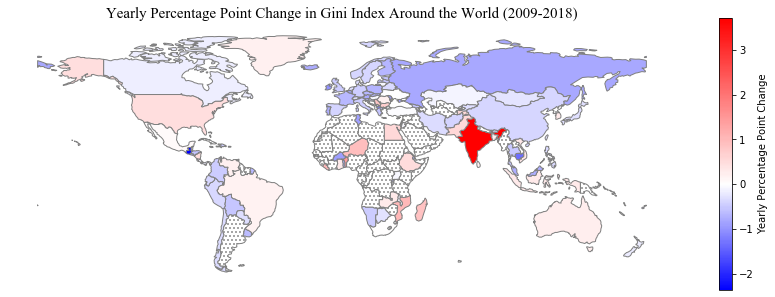

In [61]:
# Center the 0 as white in the color code
# vmin and vmax are the min and max of the gini_trend variable
divnorm = colors.DivergingNorm(vmin=-2.36, vcenter=0., vmax=3.71)

#Create map to see general trend in the World
ax = geo_merged.plot("gini_trend", figsize=(15,10), norm=divnorm, legend=True, edgecolor="grey", cmap="bwr",
                legend_kwds={"orientation":"vertical",'shrink': 0.5, 
                             "label":"Yearly Percentage Point Change"},
                missing_kwds={"color":"white","edgecolor":"grey", "hatch":"...", "label":"Missing Values"})
# Did not add title: prefer to add figure captions on the document.
ax.set_title("Yearly Percentage Point Change in Gini Index Around the World (2009-2018)", 
             fontdict={'fontsize':15}, color="k", fontname="Times New Roman")
ax.set_axis_off()
plt.savefig('gini_trend_world_map.png', dpi = 400)
plt.show()

### Best and worse countries

In [62]:
# Countries where inequality changes were more drastic.
# Top 5 countries where inequality increased the most.
increased_top = pd.DataFrame(final_gini.sort_values("gini_trend", ascending=False).head(5)["gini_trend"])
increased_top.columns.name = None
increased_top.index.name = None
increased_top = increased_top.rename(columns = {"gini_trend":"%PointChange"})
increased_top

,%PointChange
India,3.71
Benin,1.44
Mozambique,1.03
Liberia,1.02
Niger,0.94


In [63]:
my_map = ListedColormap(sns.cubehelix_palette())
my_map

increased_top = increased_top.style.background_gradient(cmap=my_map).format("{:.2f}").set_properties(**{'text-align': 'center'})
increased_top


,%PointChange
India,3.71
Benin,1.44
Mozambique,1.03
Liberia,1.02
Niger,0.94


In [64]:
# Export styled table as image
html = increased_top.render()
imgkit.from_string(html, 'Increased_top5.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [65]:
# Top 5 countries where inequality decreased the most.
decreased_top = pd.DataFrame(final_gini.sort_values("gini_trend").head(5)["gini_trend"])
decreased_top.columns.name = None
decreased_top.index.name = None
decreased_top = decreased_top.rename(columns = {"gini_trend":"%PointChange"})
decreased_top

,%PointChange
Guatemala,-2.36
Barbados,-1.86
"Gambia, The",-1.75
Cambodia,-1.34
North Macedonia,-1.23


In [66]:
decreased_top = decreased_top.style.background_gradient(cmap="Blues_r").format("{:.2f}").set_properties(**{'text-align': 'center'})
decreased_top

,%PointChange
Guatemala,-2.36
Barbados,-1.86
"Gambia, The",-1.75
Cambodia,-1.34
North Macedonia,-1.23


In [67]:
# Export styled table as image
html = decreased_top.render()
imgkit.from_string(html, 'Decreased_top5.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

### Out of the 115 countries how many increased and how many increased inequality?

In [68]:
# Number of countries that increased/decreased/not changed income inequality
c = final_gini.groupby(final_gini['gini_trend'].apply(lambda x: 'decreased' if x < 0 
                        else 'increased' if x > 0 else 'negligible change'))['gini_trend'].count()

# Percentage of countries that increased/decreased/not changed income inequality
percentage = (c /c.sum())*100
percentage.round(0)


gini_trend
decreased            71.0
increased            28.0
negligible change     1.0
Name: gini_trend, dtype: float64

### How big changes are?

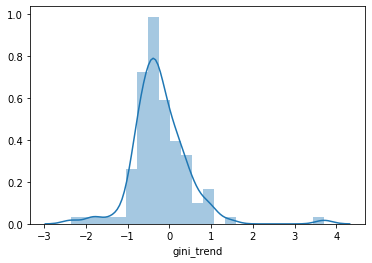

In [69]:
# Create a distribution
fig = plt.figure()
vis = sns.distplot(final_gini["gini_trend"])

# final_gini["gini_trend"].plot(kind="hist")

In [70]:
# Create ranges to see how big were the changes in the countries
ranges = [-3,-2,-1, 0, 1, 2, 3, 4]
labels = ["-3 to -2", "-2 to -1", "-1 to 0", "0 to 1", "1 to 2", "2 to 3", "3 to 4"]

rang_change = pd.DataFrame(final_gini.groupby(pd.cut(final_gini.gini_trend, ranges, 
                                                     labels=labels))["gini_trend"].count())
rang_change

,gini_trend
gini_trend,
-3 to -2,1
-2 to -1,5
-1 to 0,77
0 to 1,28
1 to 2,3
2 to 3,0
3 to 4,1


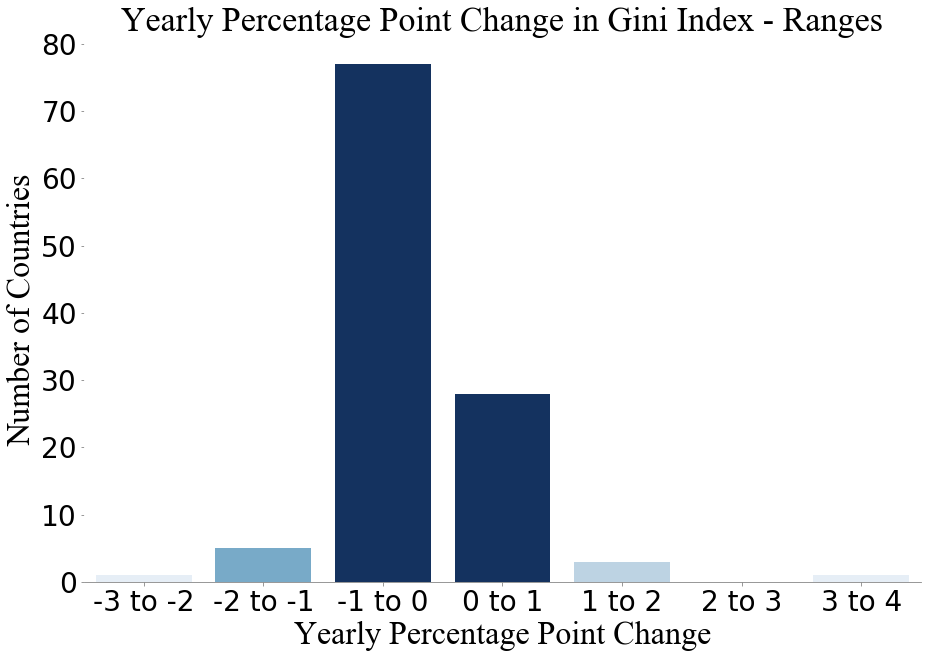

In [71]:
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(x=rang_change.index, y = "gini_trend", data=rang_change,  palette=plt.cm.Blues(rang_change['gini_trend']*.1))
for item in ax.get_xticklabels():
    item.set_rotation(0)
plt.xlabel("Yearly Percentage Point Change", fontsize = 32, color="k", fontname="Times New Roman")
plt.ylabel("Number of Countries", fontsize = 32, color="k", fontname="Times New Roman")
ax.set_title("Yearly Percentage Point Change in Gini Index - Ranges", fontdict={'fontsize':34}, color="k",
            fontname="Times New Roman")
plt.xticks(fontsize=28, color="grey")
plt.yticks(fontsize=28, color="grey")
plt.tick_params(color='grey', labelcolor='k')
for pos in ['top', 'right', 'left']:
    ax.spines[pos].set_edgecolor("white")
ax.spines["bottom"].set_edgecolor("grey")
plt.savefig('RangesInequalityChange.png', dpi = 400, bbox_inches='tight')
plt.show()

### How different regions compare?

In [72]:
# Make a dictionary color for the regions

my_pal = {"Asia": "#35264c", "Oceania": "#366da0", "Europe":"#d2c060", 
          "Americas":"#44bcad", "Africa":"#aee3c0"}

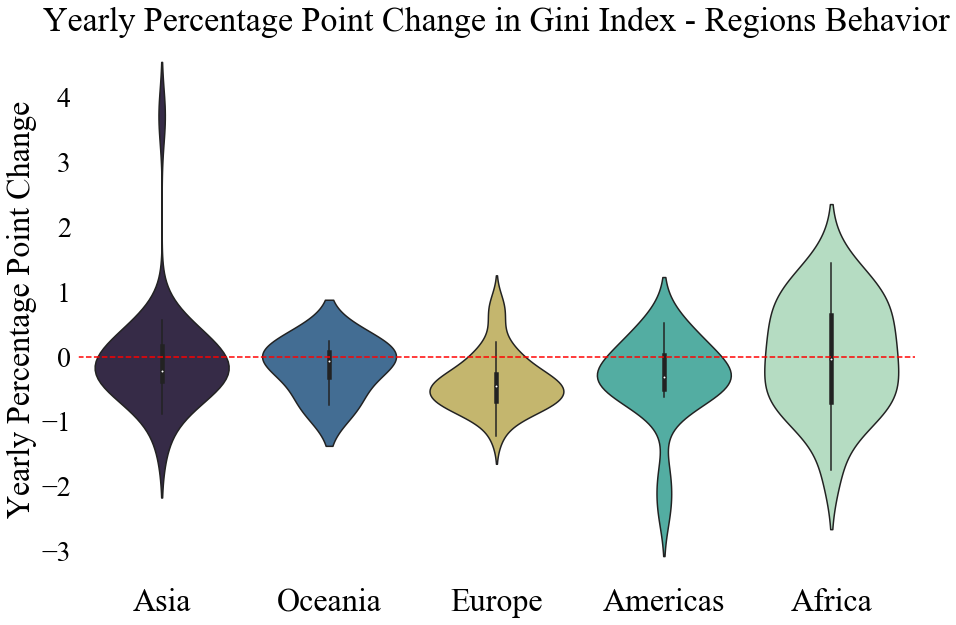

In [73]:
# Will create a violin plot

fig = plt.figure(figsize=(15,10))
ax = sns.violinplot(data=final_gini, x="region", y="gini_trend", scale="width", 
                    palette=my_pal)
ax.set_title("Yearly Percentage Point Change in Gini Index - Regions Behavior", fontdict={'fontsize':34}, color="k",
            fontname="Times New Roman")
plt.xlabel("", color="k")
plt.ylabel("Yearly Percentage Point Change", fontsize=32, fontname="Times New Roman")
plt.xticks(fontsize=32, fontname="Times New Roman")
plt.yticks(fontsize=28, fontname="Times New Roman")
ax.axhline(0, ls='--', color="red")
# ax.text(-0.65,0.4, "No change", color="red", fontsize=12)
for pos in ['top', 'right', 'bottom']:
    ax.spines[pos].set_edgecolor("white")
ax.spines["left"].set_edgecolor("white")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False )     # ticks along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False )       # ticks along the left edge are off

plt.savefig('gini_trend_regions.png', dpi = 400)
plt.show()


### Change vs initial value

In [74]:
# Make a copy of the gini_table
gini_first = final_gini.copy(deep=True)

In [75]:
# Get initial not null gini value in each row (Country)- This is the "initial" point of comparison
gini_first["first"] = gini_first[['g2009', 'g2010', 'g2011','g2012', 'g2013', 'g2014', 'g2015', 
                                   'g2016','g2017', 'g2018']].bfill(axis=1).iloc[:, 0].fillna('unknown')

gini_first


,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,gini_trend,first
country,,,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.00,NaN,NaN,NaN,NaN,31.00,NaN,-0.40,33.00
Armenia,ARM,AM,Asia,Western Asia,31.76,33.10,33.22,29.60,30.58,31.48,32.36,32.55,33.62,NaN,0.10,31.76
Australia,AUS,AU,Oceania,Australia and New Zealand,NaN,35.18,28.30,38.57,NaN,37.96,NaN,33.00,NaN,NaN,0.24,35.18
Austria,AUT,AT,Europe,Western Europe,34.48,32.41,33.74,33.46,32.38,33.33,33.45,27.80,27.90,26.8,-0.78,34.48
Bangladesh,BGD,BD,Asia,Southern Asia,NaN,38.97,NaN,NaN,NaN,NaN,NaN,40.34,NaN,NaN,0.23,38.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,UY,Americas,South America,45.70,43.11,41.38,39.06,39.37,39.29,39.34,38.59,38.82,39.1,-0.62,45.70
Venezuela,VEN,VE,Americas,South America,38.10,36.20,36.80,38.40,38.80,37.80,NaN,NaN,NaN,NaN,0.23,38.10
Vietnam,VNM,VN,Asia,South-eastern Asia,NaN,40.16,NaN,37.29,NaN,36.48,NaN,39.18,NaN,42.4,0.32,40.16


#### How many countries increased or decreased their inequality according to their inequality state?

In [76]:
# Add categories for inequality
# The warning level of Gini index is 40
ranges = [0, 20, 30, 40, 50, 100]
labels = ["Perfect equality", "Adequate equality", "Low inequality", 
          "High inequality", "Severe inequality"]

gini_first['classification'] = pd.cut(gini_first["first"], ranges, labels=labels)

gini_first


,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,gini_trend,first,classification
country,,,,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.00,NaN,NaN,NaN,NaN,31.00,NaN,-0.40,33.00,Low inequality
Armenia,ARM,AM,Asia,Western Asia,31.76,33.10,33.22,29.60,30.58,31.48,32.36,32.55,33.62,NaN,0.10,31.76,Low inequality
Australia,AUS,AU,Oceania,Australia and New Zealand,NaN,35.18,28.30,38.57,NaN,37.96,NaN,33.00,NaN,NaN,0.24,35.18,Low inequality
Austria,AUT,AT,Europe,Western Europe,34.48,32.41,33.74,33.46,32.38,33.33,33.45,27.80,27.90,26.8,-0.78,34.48,Low inequality
Bangladesh,BGD,BD,Asia,Southern Asia,NaN,38.97,NaN,NaN,NaN,NaN,NaN,40.34,NaN,NaN,0.23,38.97,Low inequality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,UY,Americas,South America,45.70,43.11,41.38,39.06,39.37,39.29,39.34,38.59,38.82,39.1,-0.62,45.70,High inequality
Venezuela,VEN,VE,Americas,South America,38.10,36.20,36.80,38.40,38.80,37.80,NaN,NaN,NaN,NaN,0.23,38.10,Low inequality
Vietnam,VNM,VN,Asia,South-eastern Asia,NaN,40.16,NaN,37.29,NaN,36.48,NaN,39.18,NaN,42.4,0.32,40.16,High inequality


In [77]:
# Add categories for gini index trend. Two categories: increased/decreased

ranges1 = [-5, 0, 5]
labels1 = ["Decreased", "Increased"]

gini_first['Direction'] = pd.cut(gini_first["gini_trend"], ranges1, labels=labels1)

gini_first

,code3,code2,region,sub_region,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017,g2018,gini_trend,first,classification,Direction
country,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,NaN,NaN,NaN,33.00,NaN,NaN,NaN,NaN,31.00,NaN,-0.40,33.00,Low inequality,Decreased
Armenia,ARM,AM,Asia,Western Asia,31.76,33.10,33.22,29.60,30.58,31.48,32.36,32.55,33.62,NaN,0.10,31.76,Low inequality,Increased
Australia,AUS,AU,Oceania,Australia and New Zealand,NaN,35.18,28.30,38.57,NaN,37.96,NaN,33.00,NaN,NaN,0.24,35.18,Low inequality,Increased
Austria,AUT,AT,Europe,Western Europe,34.48,32.41,33.74,33.46,32.38,33.33,33.45,27.80,27.90,26.8,-0.78,34.48,Low inequality,Decreased
Bangladesh,BGD,BD,Asia,Southern Asia,NaN,38.97,NaN,NaN,NaN,NaN,NaN,40.34,NaN,NaN,0.23,38.97,Low inequality,Increased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,UY,Americas,South America,45.70,43.11,41.38,39.06,39.37,39.29,39.34,38.59,38.82,39.1,-0.62,45.70,High inequality,Decreased
Venezuela,VEN,VE,Americas,South America,38.10,36.20,36.80,38.40,38.80,37.80,NaN,NaN,NaN,NaN,0.23,38.10,Low inequality,Increased
Vietnam,VNM,VN,Asia,South-eastern Asia,NaN,40.16,NaN,37.29,NaN,36.48,NaN,39.18,NaN,42.4,0.32,40.16,High inequality,Increased


In [78]:
# Percentage of countries according to their inequality level. Cnsidering first reported value
# between 1009 and 2018)
div = gini_first.groupby("Direction")["classification"].value_counts().unstack()
div


classification,Adequate equality,High inequality,Low inequality,Severe inequality
Direction,,,,
Decreased,10,25,39,9
Increased,2,10,18,2


In [79]:
# Re-order columns
div = div[['Adequate equality', 'Low inequality', 'High inequality','Severe inequality']]
div

classification,Adequate equality,Low inequality,High inequality,Severe inequality
Direction,,,,
Decreased,10,39,25,9
Increased,2,18,10,2


In [80]:
# Define function to determine percentage of countries that decreased or increased gini index
def get_perc(series):
    return ((series / series.sum()))

In [81]:
perc_categories = div.apply(get_perc)
perc_categories= perc_categories.T
perc_categories.columns.name = None
perc_categories.index.name = None
perc_categories

,Decreased,Increased
Adequate equality,0.833333,0.166667
Low inequality,0.684211,0.315789
High inequality,0.714286,0.285714
Severe inequality,0.818182,0.181818


In [82]:
# Function from Pandas documentation
# Link: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [83]:
cat_table = perc_categories.style.apply(highlight_max, color='darkorange',subset=['Increased'], axis=0)\
.apply(highlight_max, color='lightblue',subset=['Decreased'], axis=0)\
.format("{:.1%}")\
.set_properties(**{'text-align': 'center'})
cat_table

,Decreased,Increased
Adequate equality,83.3%,16.7%
Low inequality,68.4%,31.6%
High inequality,71.4%,28.6%
Severe inequality,81.8%,18.2%


In [84]:
# Render table
html = cat_table.render()

In [85]:
# Export styled table
imgkit.from_string(html, 'categories_table.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

#### Now lets create a figure with all this information

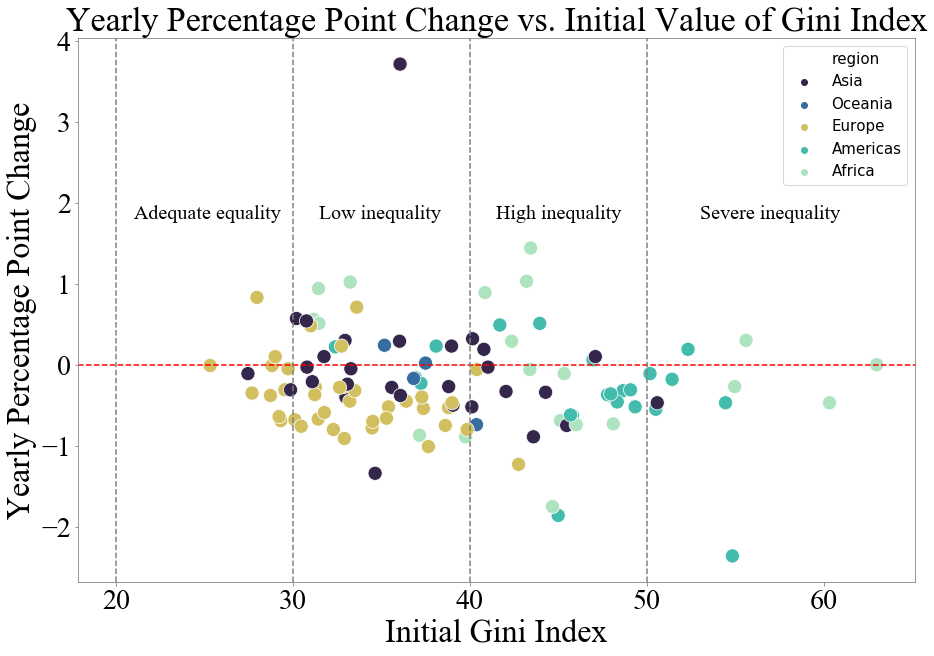

In [86]:
# Define figure and axes
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(y="gini_trend",x="first",data=gini_first, hue="region", s=200, palette=my_pal)
# Vertical and horizontal lines
ax.axhline(0, ls='--', color="red")
ax.axvline(20, ls='--', color="grey")
ax.axvline(30, ls='--', color="grey")
ax.axvline(40, ls='--', color="grey")
ax.axvline(50, ls='--', color="grey")
# Text boxes
ax.text(21,1.8, "Adequate equality", color="k", fontsize=20, fontname="Times New Roman")
ax.text(31.5,1.8, "Low inequality", color="k", fontsize=20, fontname="Times New Roman")
ax.text(41.5,1.8, "High inequality", color="k", fontsize=20, fontname="Times New Roman")
ax.text(53,1.8, "Severe inequality", color="k", fontsize=20, fontname="Times New Roman")
# Labels
plt.xlabel("Initial Gini Index", fontsize=32, fontname="Times New Roman", color="k")
plt.ylabel("Yearly Percentage Point Change", fontsize=32, fontname="Times New Roman", color="k")
# Title
ax.set_title("Yearly Percentage Point Change vs. Initial Value of Gini Index", fontdict={'fontsize':34}, color="k",
            fontname="Times New Roman")
# Frame
for pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[pos].set_edgecolor("grey")
# Axis ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    color="grey" )     # ticks along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    color="grey")       # ticks along the left edge are off
# Ticks labels
plt.xticks(fontsize=28, fontname="Times New Roman")
plt.yticks(fontsize=28, fontname="Times New Roman")
# Legend
plt.legend(prop={'size': 15})
# Save Figure
plt.savefig('InitialValueAndChange.png', dpi = 400)

plt.show()
